In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
plt.rc("font", size=15)
import warnings
warnings.simplefilter(action='ignore')

# House Price: Advanced Regression Techniques

## Exploratory Data Analysis

In [2]:
train = pd.read_csv("Data file_Project03_train.csv")
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [3]:
test = pd.read_csv("Data file_Project03_test.csv")
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

### Data Description

In [5]:
df = pd.concat([train,test],axis=0)

In [6]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1168.000000  
mean      2.758904     43.489041     6.321918  2007.815753  181477.005993  
std      40.177307    496.123024     2.703626     1.328095   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 291
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallCo

In [8]:
#divide dataset into two parts(categorical, contineous)
categorical, numerical = [],[]
for z in df.columns:
    t = df.dtypes[z]
    if t=='object':
        categorical.append(z)
    else:
        numerical.append(z)
print("CategoricaL:\n{}".format(categorical))
print("\nNumericaL:\n{}".format(numerical))

CategoricaL:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

NumericaL:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'Wood

In [9]:
print('Numerical Features:{}'.format(len(numerical)))
print('Categorical Features:{}'.format(len(categorical)))

Numerical Features:38
Categorical Features:43


In [10]:
year = [feature for feature in numerical if 'Mo' in feature or 'Yr' in feature or 'Year' in feature]
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

In [11]:
#finding the unique values in each column (type object)
for col in df.select_dtypes('O').columns:
    print('We have {} unique values in {} column : {}'.format(len(df[col].unique()),col,df[col].unique()))
    print('-'*100)

We have 5 unique values in MSZoning column : ['RL' 'RM' 'FV' 'RH' 'C (all)']
----------------------------------------------------------------------------------------------------
We have 2 unique values in Street column : ['Pave' 'Grvl']
----------------------------------------------------------------------------------------------------
We have 3 unique values in Alley column : [nan 'Grvl' 'Pave']
----------------------------------------------------------------------------------------------------
We have 4 unique values in LotShape column : ['IR1' 'Reg' 'IR2' 'IR3']
----------------------------------------------------------------------------------------------------
We have 4 unique values in LandContour column : ['Lvl' 'Bnk' 'HLS' 'Low']
----------------------------------------------------------------------------------------------------
We have 2 unique values in Utilities column : ['AllPub' 'NoSeWa']
--------------------------------------------------------------------------------------

In [12]:
#print the count of unique values in each categorical columns
print('Categorical columns Unique values count\n')
for col in categorical:
    print(col,'-'*(30-len(col)),'>',len(df[col].unique()))

Categorical columns Unique values count

MSZoning ---------------------- > 5
Street ------------------------ > 2
Alley ------------------------- > 3
LotShape ---------------------- > 4
LandContour ------------------- > 4
Utilities --------------------- > 2
LotConfig --------------------- > 5
LandSlope --------------------- > 3
Neighborhood ------------------ > 25
Condition1 -------------------- > 9
Condition2 -------------------- > 8
BldgType ---------------------- > 5
HouseStyle -------------------- > 8
RoofStyle --------------------- > 6
RoofMatl ---------------------- > 8
Exterior1st ------------------- > 15
Exterior2nd ------------------- > 16
MasVnrType -------------------- > 5
ExterQual --------------------- > 4
ExterCond --------------------- > 5
Foundation -------------------- > 6
BsmtQual ---------------------- > 5
BsmtCond ---------------------- > 5
BsmtExposure ------------------ > 5
BsmtFinType1 ------------------ > 7
BsmtFinType2 ------------------ > 7
Heating ------------

### Missing Values

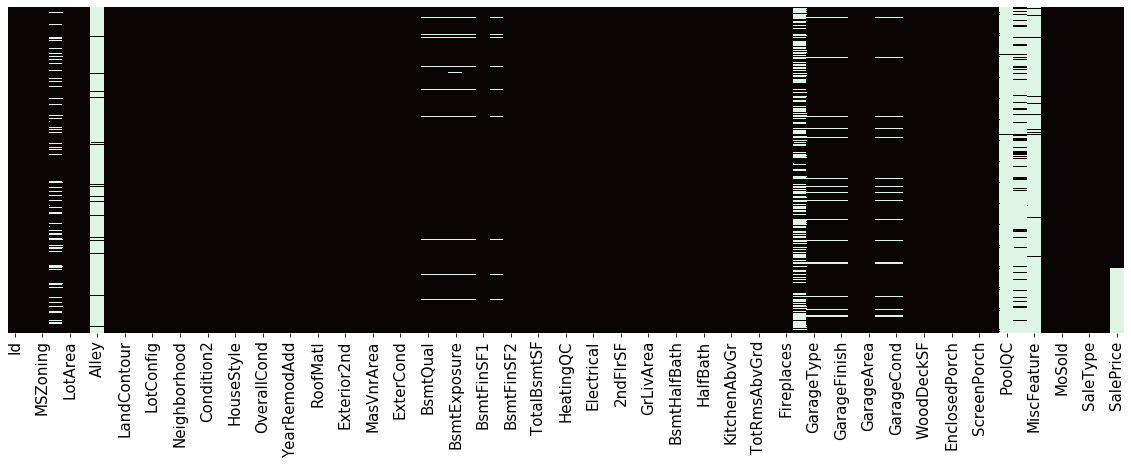

In [13]:
plt.figure(figsize=(20,6));
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='mako')

In [14]:
variable = [feature for feature in categorical if df[feature].isnull().sum()]
for feature in variable:
    print("{}: {}%".format(feature,np.round(df[feature].isnull().mean(),3)))

Alley: 0.938%
MasVnrType: 0.005%
BsmtQual: 0.025%
BsmtCond: 0.025%
BsmtExposure: 0.026%
BsmtFinType1: 0.025%
BsmtFinType2: 0.026%
Electrical: 0.001%
FireplaceQu: 0.473%
GarageType: 0.055%
GarageFinish: 0.055%
GarageQual: 0.055%
GarageCond: 0.055%
PoolQC: 0.995%
Fence: 0.808%
MiscFeature: 0.963%


In [15]:
variable = [feature for feature in numerical if df[feature].isnull().sum()]
for feature in variable:
    print("{}: {}%".format(feature,np.round(df[feature].isnull().mean(),3)))

LotFrontage: 0.177%
MasVnrArea: 0.005%
GarageYrBlt: 0.055%
SalePrice: 0.2%


In [16]:
# Meaning that there is no Miscellaneous feature.
df.fillna({'Alley': 'None', 'Fence':'None', 'MiscFeature':'None', 
           'PoolQC':'None', 'FireplaceQu':'None', 'MasVnrType':'None'}, inplace = True)

#Meaning that there is no basement(Categorical).
df.fillna({'BsmtQual':'None', 'BsmtCond':'None',
           'BsmtExposure':'None', 'BsmtFinType1':'None',
           'BsmtFinType2':'None'},inplace=True)

#Missing Basement Columns(Numerical)
Bsmt_con = ['MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
            'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath','BsmtFinSF1', 
            'BsmtFinSF2', 'BsmtUnfSF']
for Bsmt in Bsmt_con:
    df[Bsmt].fillna(0, inplace=True)
    
#missing Garage columns(Categorical)
df.fillna({'GarageType':'None','GarageCond': 'None', 'GarageQual':'None', 
           'GarageQual':'None', 'GarageFinish': 'None'}, inplace=True)

#Missing Garage Columns(Numerical)
df.fillna({'GarageCars':0, 'GarageArea': 0}, inplace = True)

#Replacing Other categorical variable with its mode
df['MSZoning']=df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])
df['Functional']=df['Functional'].fillna(df['Functional'].mode()[0])
df['KitchenQual']=df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['SaleType']=df['SaleType'].fillna(df['SaleType'].mode()[0])
df['Utilities']=df['Utilities'].fillna(df['Utilities'].mode()[0])
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())


df['Exterior1st'].fillna('Other' ,inplace=True)
df['Exterior2nd'].fillna('Other' ,inplace=True)

### Correlation

In [17]:
corr =df.corr()
corr.sort_values(['SalePrice'], ascending= False, inplace=True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.460535
Fireplaces       0.459611
GarageYrBlt      0.453840
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323850
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
PoolArea         0.103280
ScreenPorch      0.100284
MoSold           0.072764
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
Id              -0.023897
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePr

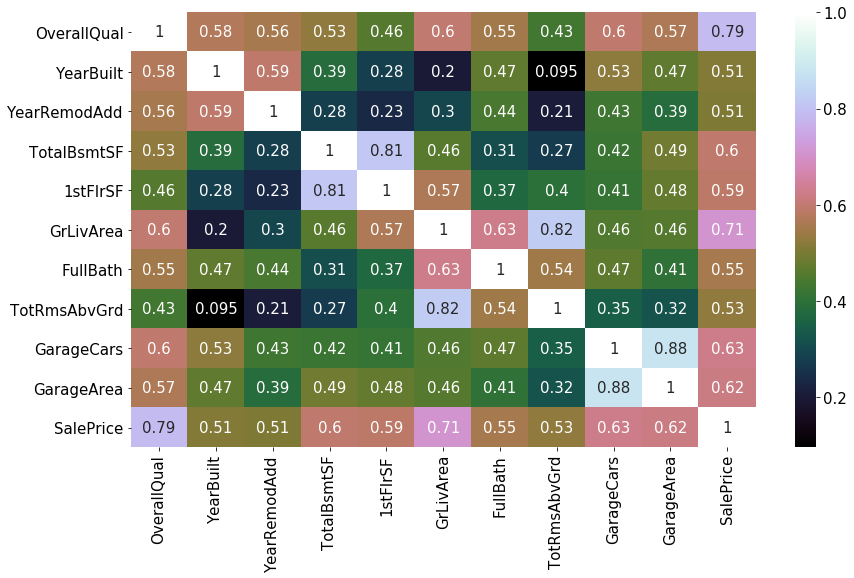

In [18]:
# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(14,8))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="cubehelix")

In [19]:
#categorical variable
categorical_num = [feature for feature in numerical if len(df[feature].unique())<20 and feature not in year+['Id']]

In [27]:
#continuous variable
contineous = [feature for feature in numerical if len(df[feature]) and feature not in year+['Id']+categorical_num]

In [28]:
plt.figure(figsize=(25, 15))
heatmap =sns.heatmap(df[contineous].corr(), annot = True,  cmap="crest")
heatmap.set_title('Correlation Heatmap');

ValueError: Colormap crest is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

<Figure size 1800x1080 with 0 Axes>

### Visualization

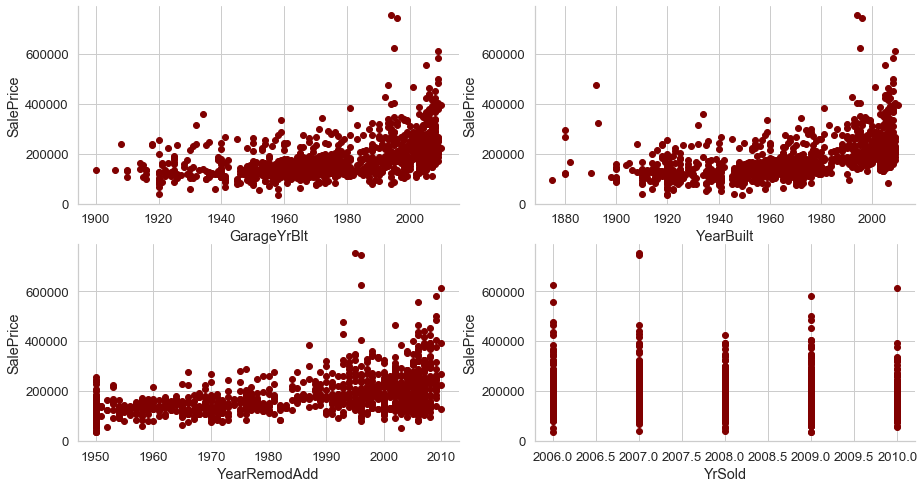

In [26]:
year_features = ['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold']

plt.figure(figsize=(15, 8))
sns.set(font_scale= 1.2)
sns.set_style('whitegrid')

for i, features in enumerate(year_features):
    plt.subplot(2, 2, i+1)
    plt.scatter(data=train, x=features, y='SalePrice', color ="maroon")  
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    
sns.despine()

In [38]:
plt.figure(figsize=(14, 8))
sns.distplot(data=train,x="SalePrice", y ="MoSold", fill=True,common_norm=False, palette="husl", alpha=.5, linewidth=1)

TypeError: distplot() got an unexpected keyword argument 'data'

<Figure size 1008x576 with 0 Axes>

### Attribute

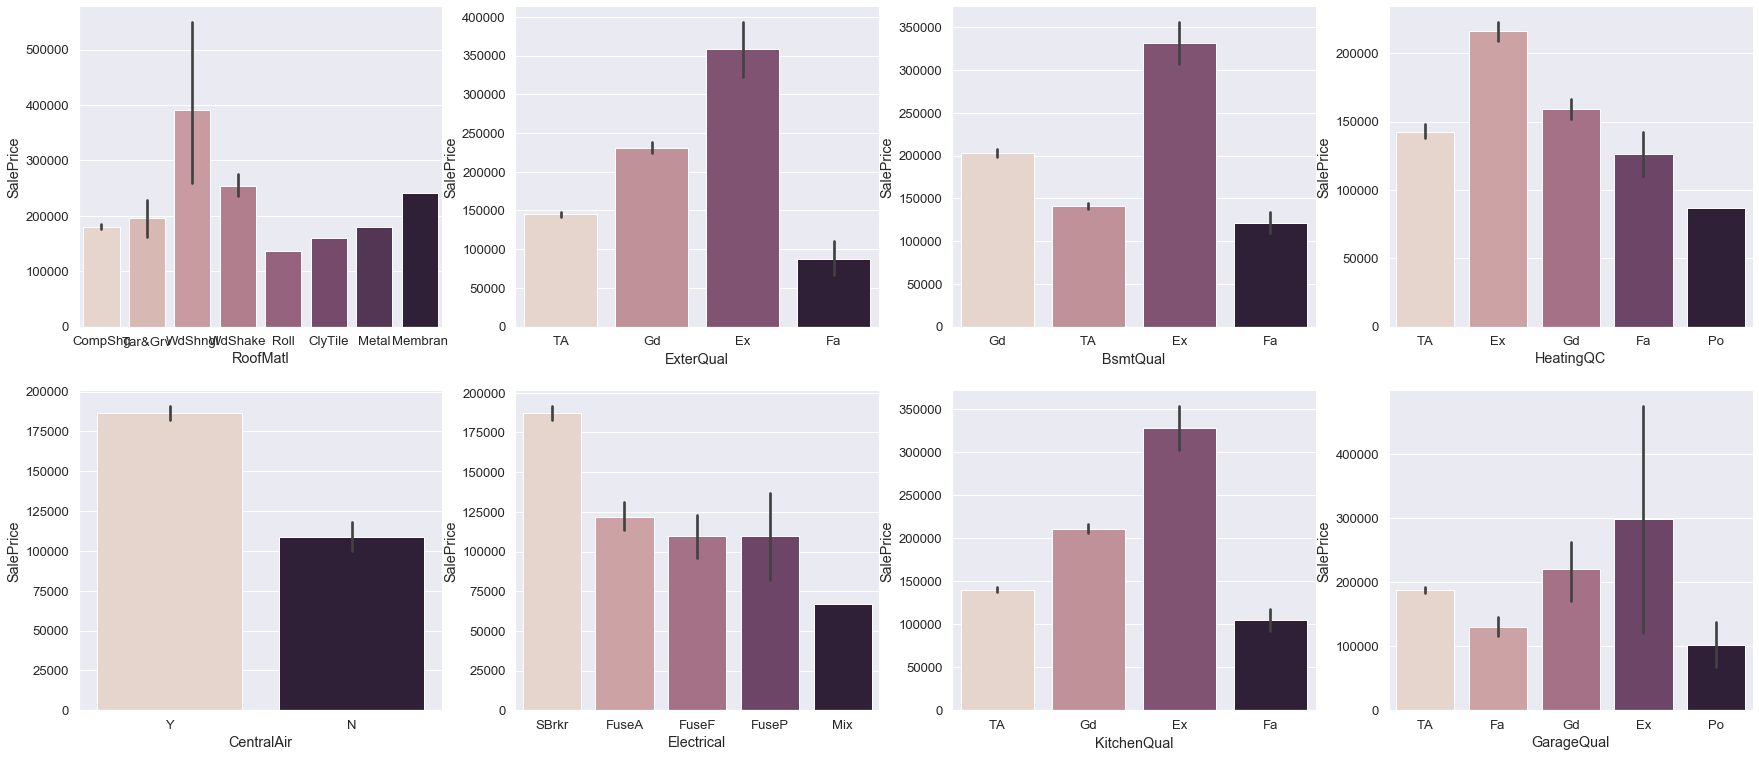

In [34]:
Quality_features = [ 'RoofMatl', 'ExterQual', 'BsmtQual', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageQual']

plt.figure(figsize=(30, 20))
sns.set(font_scale= 1.2)
sns.set_style('darkgrid')

for i, feature in enumerate(Quality_features):
    plt.subplot(3, 4, i+1)
    sns.barplot(data=train, x=feature, y='SalePrice', palette="ch:.10")  
    
    
sns.despine()

### Outliers

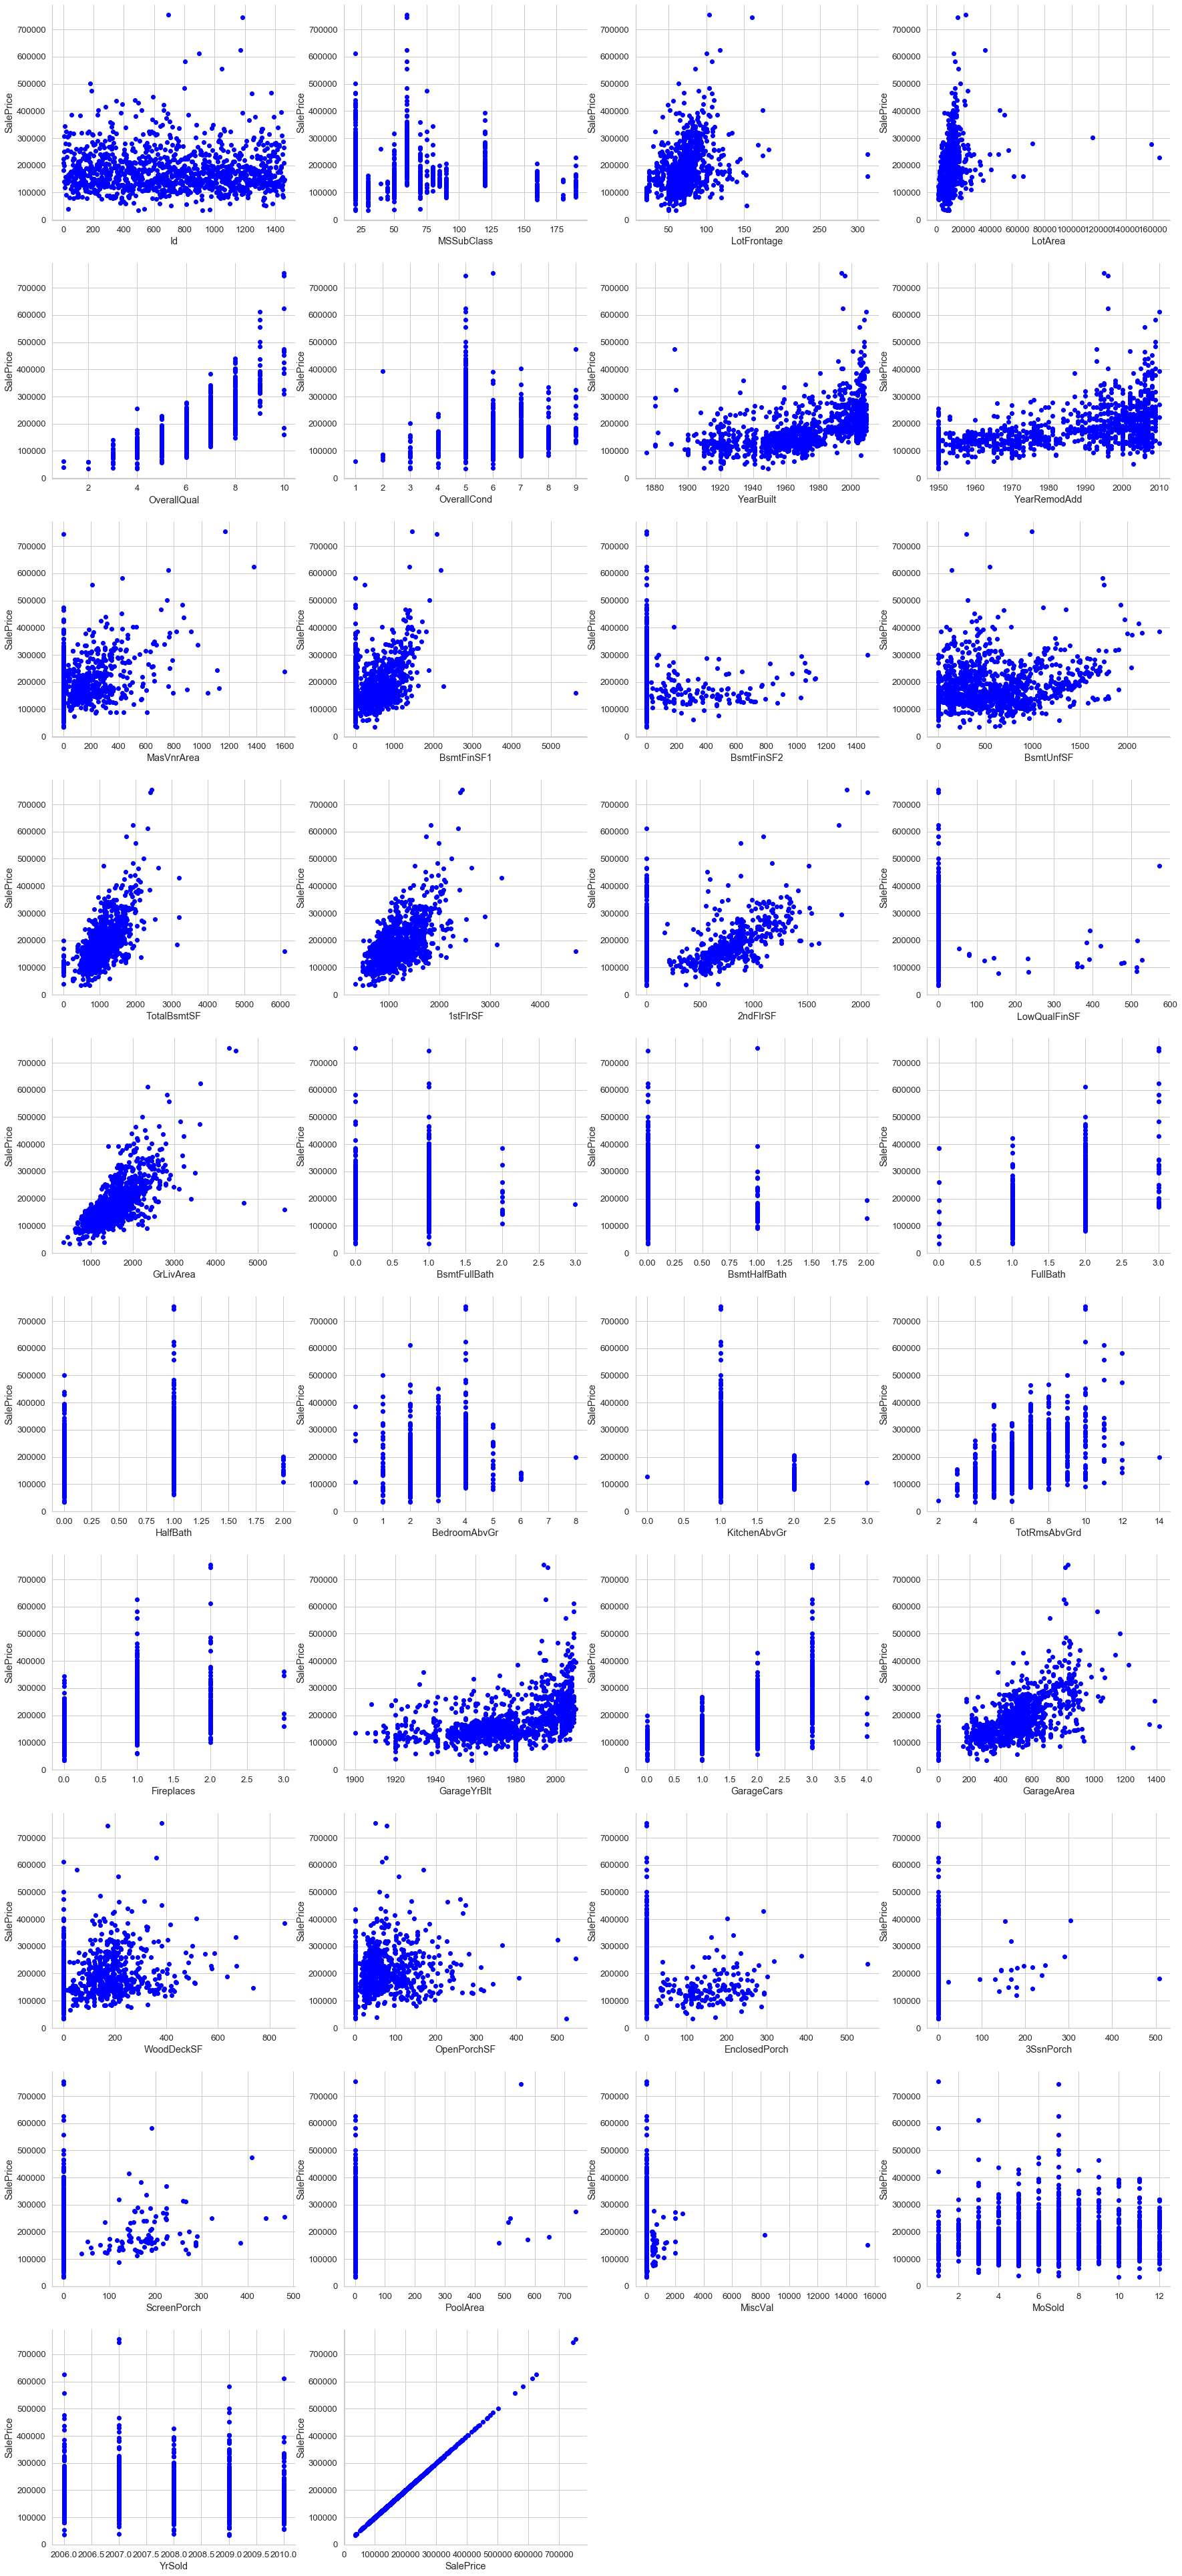

In [35]:
# We shall plot these figures
plt.figure(figsize=(30, 70))
sns.set(font_scale= 1.2)
sns.set_style('whitegrid')

for i, features in enumerate(numerical):
    plt.subplot(10, 4, i+1)
    plt.scatter(data=df.iloc[:len(train)], x=features, y='SalePrice', color ="blue")
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    
    
sns.despine()

In [36]:
df.LotFrontage[(df.LotFrontage >= 160)] = 160
df.LotArea[(df.LotArea >= 75000)] = 75000
df.MasVnrArea[(df.MasVnrArea >= 1000)] = 1000
df.BsmtFinSF1[(df.BsmtFinSF1 >= 2500)] = 2500
df.TotalBsmtSF[(df.TotalBsmtSF >= 3000)] = 3000
df['1stFlrSF'][(df['1stFlrSF'] >= 3000)] = 3000
df.GrLivArea[(df.GrLivArea >= 3500)] = 3500
df.GarageArea[(df.GarageArea >= 1500)] = 1500

### Data Transaformation

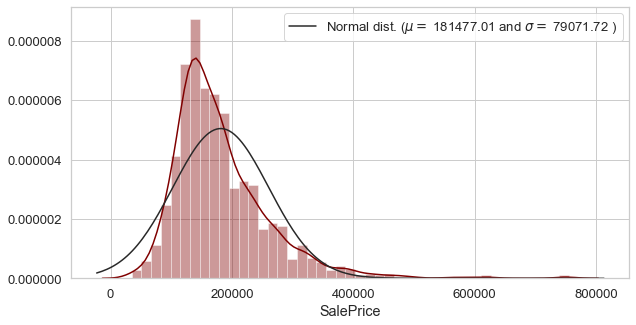

In [37]:
plt.figure(figsize=(10, 5))
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(df.iloc[:len(train)]['SalePrice'] , fit=norm, color='maroon');
(mu, sigma) = norm.fit(df.iloc[:len(train)]['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

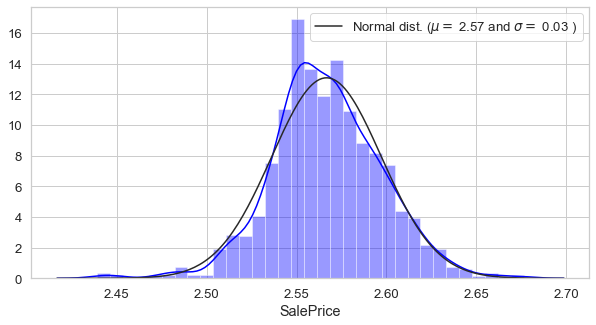

In [40]:
plt.figure(figsize=(10, 5))
df['SalePrice'] = np.log1p(df.iloc[:len(train)]['SalePrice'])
sns.distplot(df.iloc[:len(train)]['SalePrice'] , fit=norm, color='blue')
(mu, sigma) = norm.fit(df.iloc[:len(train)]['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

### Skewness

In [41]:
#if it is more than 1 or -1 it is highly skewed and between 0.5 and 1 it is moderatly skewed, between 0.5 and 0 it is almost symmetric
skewed_clm = df[contineous].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_clm= skewed_clm[skewed_clm > 0.75]
skewed_clm= skewed_clm.index

df[skewed_clm] = np.log1p(df[skewed_clm])

### Creating Dummy Variables

In [42]:
df =pd.get_dummies(df, columns=categorical, drop_first=True)

In [43]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [44]:
del df['TotalBsmtSF']

In [45]:
del df['1stFlrSF']

In [46]:
del df['2ndFlrSF']

### Train-Test Split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
new_train = df.iloc[:1460,:]
new_test = df.iloc[1460:,:]

In [49]:
x = new_train.drop(['SalePrice'], axis=1)
y = new_train['SalePrice']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) #75% training and 25% test

### Model Fitting

In [52]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [53]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

### Ridge Regression

In [54]:
ridge = RidgeCV(alphas = [1, 0.1, 0.001, 0.0005])
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('*'*30)
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 0.015057923929062968
MSE: 0.0005012865516886248
RMSE: 0.022389429463222702
R2 Square 0.4938023281299688
******************************
Train set evaluation:

MAE: 0.012267987651939118
MSE: 0.0003403378536601985
RMSE: 0.01844824798348609
R2 Square 0.6313651575108525


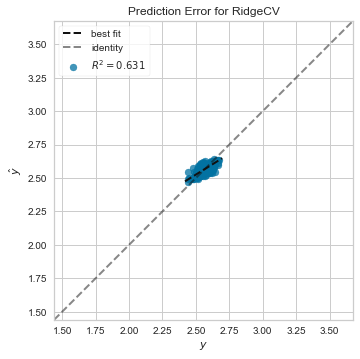

In [56]:
from yellowbrick.regressor import PredictionError
vis = PredictionError(ridge)
vis.fit(X_train, y_train)
vis.score(X_train, y_train)
vis.show()

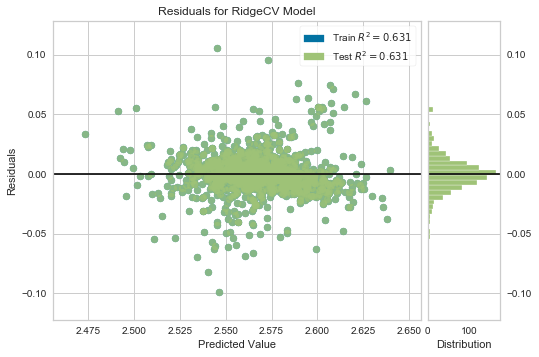

In [57]:
from yellowbrick.regressor import ResidualsPlot
vis = ResidualsPlot(ridge)
vis.fit(X_train, y_train)
vis.score(X_train, y_train)
vis.show()

### Lasso Regression

In [58]:
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005])
lasso.fit(X_train, y_train)

test_pred = lasso.predict(X_test)
train_pred = lasso.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('*'*30)
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 0.013591739104836877
MSE: 0.00047358985875424334
RMSE: 0.02176211981297418
R2 Square 0.5217703664399045
******************************
Train set evaluation:

MAE: 0.013670449203127117
MSE: 0.0004376890016008332
RMSE: 0.02092101817791938
R2 Square 0.5259198633677449


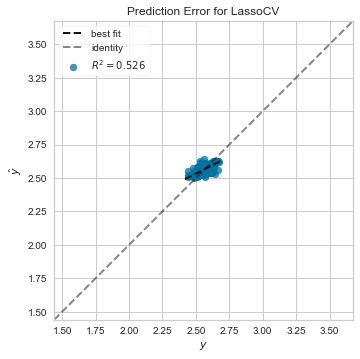

In [59]:
from yellowbrick.regressor import PredictionError
vis = PredictionError(lasso)
vis.fit(X_train, y_train)
vis.score(X_train, y_train)
vis.show()

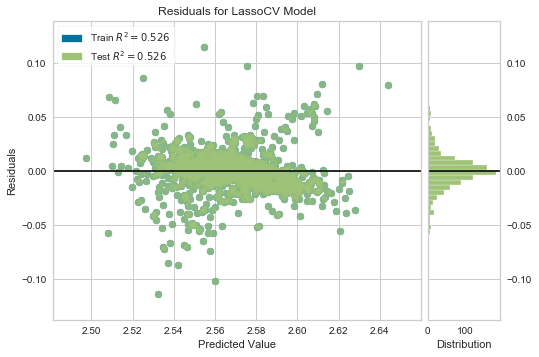

In [60]:
from yellowbrick.regressor import ResidualsPlot
vis = ResidualsPlot(lasso)
vis.fit(X_train, y_train)
vis.score(X_train, y_train)
vis.show()

### Elastic-Net Regression

In [61]:
E_model = ElasticNetCV(alphas = [1, 0.1, 0.001, 0.0005])
E_model.fit(X_train, y_train)

test_pred = E_model.predict(X_test)
train_pred = E_model.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('*'*30)
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 0.013308941053959866
MSE: 0.0004668730798645992
RMSE: 0.021607246003704388
R2 Square 0.5285529498244985
******************************
Train set evaluation:

MAE: 0.013235533186850616
MSE: 0.0004230407742740284
RMSE: 0.020567955033839132
R2 Square 0.5417860002528686


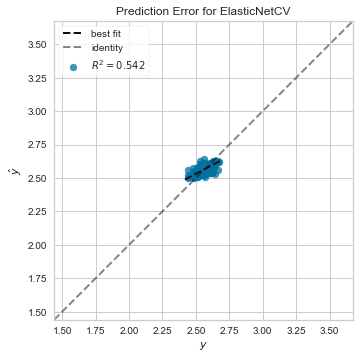

In [62]:
from yellowbrick.regressor import PredictionError
vis = PredictionError(E_model)
vis.fit(X_train, y_train)
vis.score(X_train, y_train)
vis.show()

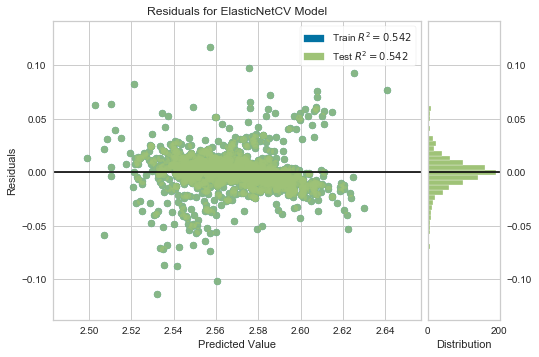

In [63]:
from yellowbrick.regressor import ResidualsPlot
vis = ResidualsPlot(E_model)
vis.fit(X_train, y_train)
vis.score(X_train, y_train)
vis.show()

In [64]:
lasso.fit(X_train, y_train)
train_pred = np.expm1(lasso.predict(X_train))
pred = np.expm1(lasso.predict(X_test))
print('Test set evaluation:\n')
print_evaluate(np.expm1(y_test), pred)
print('*'*30)
print('Train set evaluation:\n')
print_evaluate(np.expm1(y_train),train_pred)

Test set evaluation:

MAE: 0.17694962246069834
MSE: 0.08000911433152176
RMSE: 0.2828588240298007
R2 Square 0.5236085573935694
******************************
Train set evaluation:

MAE: 0.17813147891284586
MSE: 0.0741919216624595
RMSE: 0.272381940778862
R2 Square 0.5263909249138579


In [65]:
final_test=new_test.copy()

In [66]:
X = new_test.drop(['SalePrice'], axis=1)
Y = new_test[['SalePrice']]

In [67]:
final_test['SalePrice'] = np.expm1(lasso.predict(X))
final_test['Id'] = new_test['Id']

logistic_submission = final_test[['Id','SalePrice']]

logistic_submission.to_csv("submission.csv", index=False)

logistic_submission.tail()

ValueError: Found array with 0 sample(s) (shape=(0, 258)) while a minimum of 1 is required.

In [68]:
logistic_submission.head(50)

NameError: name 'logistic_submission' is not defined